<a href="https://colab.research.google.com/github/WuilsonEstacio/Variados-programas-en-python/blob/main/complexfractaljuliay_Mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# parte compleja fractal de julia Un fractal es un objeto geométrico cuya estructura básica,
# fragmentada o aparentemente irregular, se repite a diferentes escalas
# https://es.wikipedia.org/wiki/Conjunto_de_Mandelbrot
import math
import numpy as np
import numba
import matplotlib.pyplot as plt

def py_julia_fractal(z_re, z_im, j):
    '''Crea el grafico del fractal de Julia.'''
    for m in range(len(z_re)): # nos da el numero de elementos de la parter z_re
        for n in range(len(z_im)):
            z = z_re[m] + 1j * z_im[n]
            for t in range(256):
                z = z ** 2 - 0.05 + 0.68j
                if np.abs(z) > 2.0:
                    j[m, n] = t
                    break
                    
jit_julia_fractal = numba.jit(nopython=True)(py_julia_fractal)


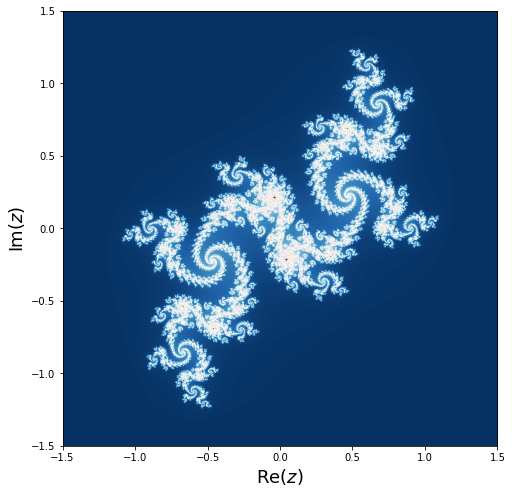

In [ ]:
N = 2024 # numero de cuadros del dibujo
j = np.zeros((N, N), np.int64)
z_real = np.linspace(-1.5, 1.5, N)
z_imag = np.linspace(-1.5, 1.5, N)
jit_julia_fractal(z_real, z_imag, j)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(j, cmap=plt.cm.RdBu_r, extent=[-1.5, 1.5, -1.5, 1.5])
ax.set_xlabel("$\mathrm{Re}(z)$", fontsize=18)
ax.set_ylabel("$\mathrm{Im}(z)$", fontsize=18)
plt.show()

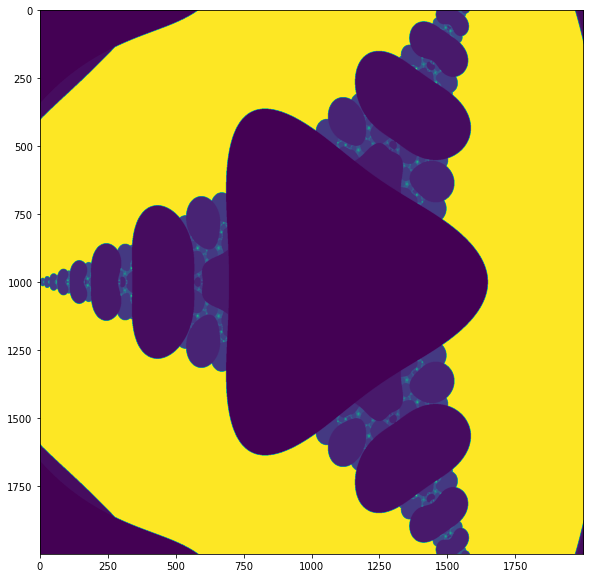

In [ ]:
# Graficando el conjunto de Mandelbrot 
# https://es.wikipedia.org/wiki/Fractal
#  El conjunto de Mandelbrot es el más estudiado de los fractales.
# Se conoce así en honor al matemático Benoît Mandelbrot
# z_(n+1) = (z_n)^2 + c c es un numero complejo

def mandelbrot( h,w, maxit=30 ):
    '''Crea el grafico del fractal de Mandelbrot del tamaño (h,w).'''
    y,x = np.ogrid[ -1.4:1.4:h*1j, -1.8:1.6:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z  = z**(-2) + c
        diverge = z*np.conj(z) > 2**2         
        div_now = diverge & (divtime==maxit)  
        divtime[div_now] = i                  
        z[diverge] = 4                        
        
    return divtime

plt.figure(figsize=(10,10))  # modifica el tamaño de la figura
plt.imshow(mandelbrot(2000,2000)) # grafica los imaginarios
plt.show()

In [ ]:
# parte compleja 2
c1 = 4 + 3j
print(c1.real)
print(c1.imag)

4.0
3.0


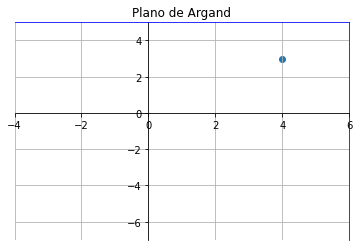

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def move_spines():
    """Crea la figura de pyplot y los ejes. Mueve las lineas de la izquierda y de abajo
    para que se intersecten con el origen. Elimina las lineas de la derecha y la de arriba.
    Devuelve los ejes."""
    fix, ax = plt.subplots()
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_position("zero")
    
    for spine in ["right", "top"]:
        ax.spines[spine].set_color("blue")
    
    return ax

ax = move_spines()
ax.set_xlim(-4, 6)
ax.set_ylim(-7, 5)
ax.grid()
ax.scatter(c1.real, c1.imag)
plt.title("Plano de Argand")
plt.show()

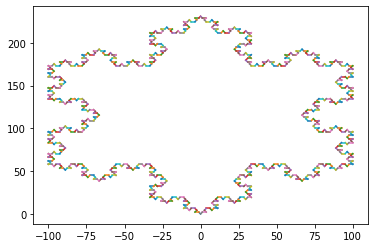

In [ ]:
from math import sin, cos, pi
import matplotlib.pyplot as plt
import matplotlib
 
def kochSnowFlake(l, n):
    x_vertex1 = 0
    y_vertex1 = 0
     
    x_vertex2 = l * cos ( 2 * pi/3)
    y_vertex2 = l * sin(2 * pi/3)
     
    x_vertex3 = l * cos (pi/3)
    y_vertex3 = l * sin(pi/3)
     
    kochCurve(x_vertex1, y_vertex1, x_vertex2, y_vertex2, n)
    kochCurve(x_vertex2, y_vertex2, x_vertex3, y_vertex3, n)
    kochCurve(x_vertex3, y_vertex3, x_vertex1, y_vertex1, n)
     
    return
         
def kochCurve(xi, yi, xf, yf, n):
    if n==0:
       plt.plot([xi,xf],[yi,yf])
             
    elif n>0:
        x1 = xi + (xf - xi) / 3.0
        y1 = yi + (yf - yi) / 3.0
 
        x3 = xf - (xf - xi) / 3.0
        y3 = yf - (yf - yi) / 3.0
         
        x2 = (x1 + x3) * cos (pi/3) - ( y3 - y1) * sin (pi/3)
        y2 = (y1 + y3) * cos (pi/3) + ( x3 - x1) * sin (pi/3) 
 
        kochCurve(xi,yi,x1,y1,n-1)
        kochCurve(x1,y1,x2,y2,n-1)
        kochCurve(x2,y2,x3,y3,n-1)
        kochCurve(x3,y3,xf,yf,n-1)
         
    return
   
plt.figure("Koch snowflack")
kochSnowFlake(200,4) # range 1 -6
plt.show()